In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_1 = pd.read_csv("../data/processed/df_1.csv", index_col=0)
df_2 = pd.read_csv("../data/processed/df_2.csv", index_col=0)
df_3 = pd.read_csv("../data/processed/df_3.csv", index_col=0)
df_4 = pd.read_csv("../data/processed/df_4.csv", index_col=0)

## log transformation on some (continuous) variables

In [7]:
# define function to preview the distribution of the (cont.) variables
def plot_cont_var_dist(df):
    cols = list(filter(lambda x: x.startswith("Variable"), df.columns))
    fig, axs = plt.subplots(len(cols)//4, 4, figsize=(20,20))
    for i, col in enumerate(cols):
        df[col].hist(ax=axs[i//4][i%4])
        axs[i//4][i%4].set_title(f"Histogram for {col}")
    plt.show()

# define function to preview the distribution of the log (cont.) variables
def plot_cont_log_var_dist(df):
    cols = list(filter(lambda x: x.startswith("Variable"), df.columns))
    fig, axs = plt.subplots(len(cols)//4, 4, figsize=(20,20))
    for i, col in enumerate(cols):
        np.log(df[col]).hist(ax=axs[i//4][i%4])
        axs[i//4][i%4].set_title(f"Histogram for log({col})")
    plt.show()

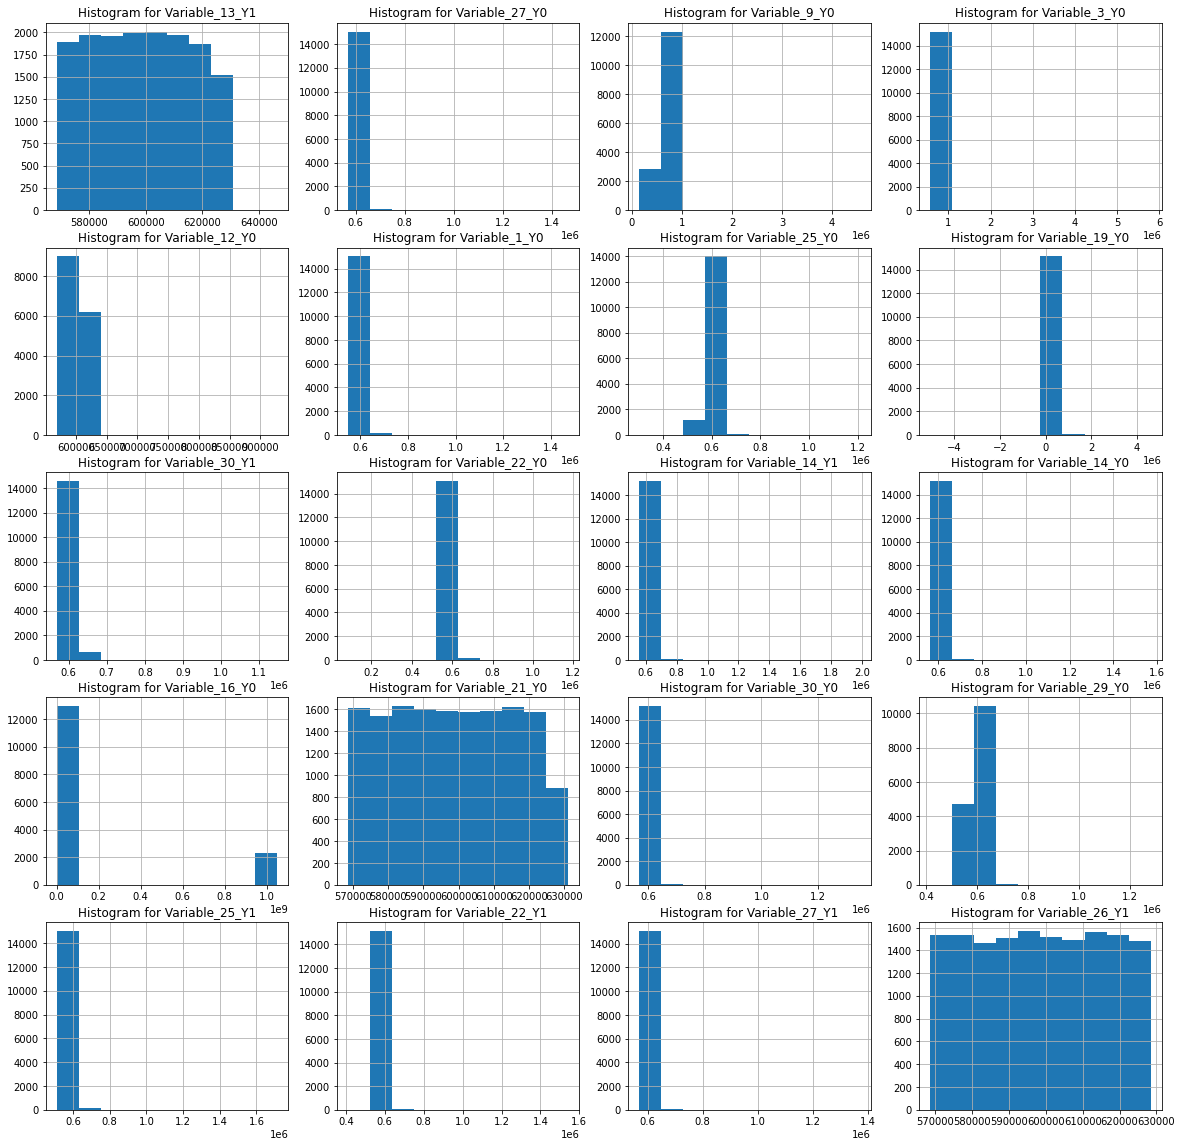

In [4]:
plot_cont_var_dist(df_1)
# df_1["Variable_12_Y0"].hist()

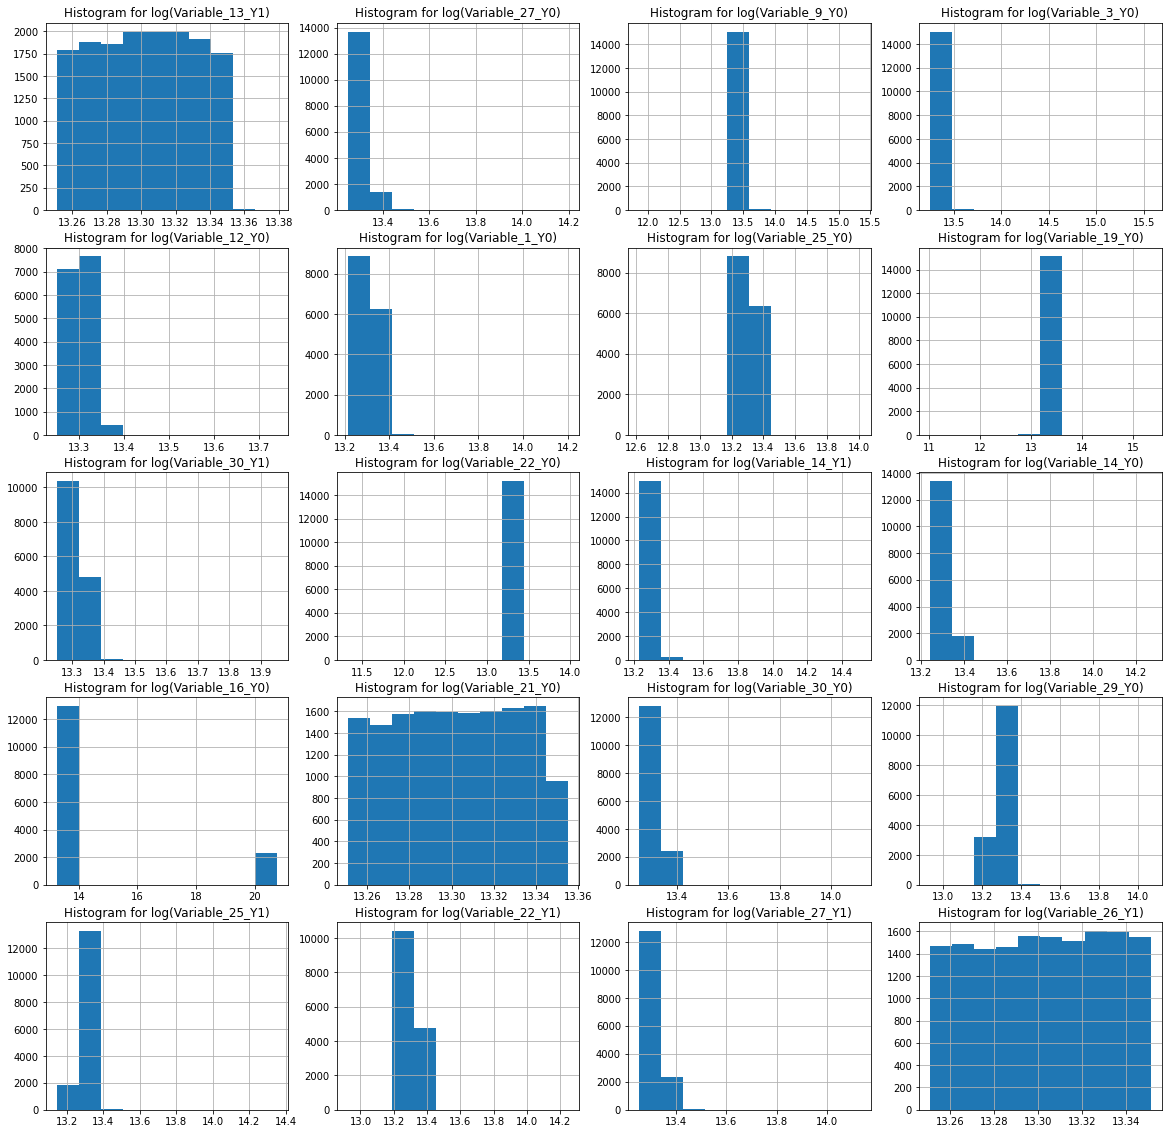

In [8]:
plot_cont_log_var_dist(df_1)

In [ ]:
def log_transform(df, cols):
    df.loc[:,cols] = df.loc[:,cols].apply(lambda x: np.log(x))

In [9]:
# standardize the variables
sc = StandardScaler()
df_1.iloc[:,6:] = sc.fit_transform(df_1.iloc[:,6:])
sc = StandardScaler()
df_2.iloc[:,6:] = sc.fit_transform(df_2.iloc[:,6:])
sc = StandardScaler()
df_3.iloc[:,6:] = sc.fit_transform(df_3.iloc[:,6:])
sc = StandardScaler()
df_4.iloc[:,6:] = sc.fit_transform(df_4.iloc[:,6:])

# df_1.iloc[:,6:] = df_1.iloc[:,6:] / df_1.iloc[:,6:].max()
# df_2.iloc[:,6:] = df_2.iloc[:,6:] / df_2.iloc[:,6:].max()
# df_3.iloc[:,6:] = df_3.iloc[:,6:] / df_3.iloc[:,6:].max()
# df_4.iloc[:,6:] = df_4.iloc[:,6:] / df_4.iloc[:,6:].max()

In [10]:
# drop the years in the period, only leaving Quarter, and one-hot encode
def classify_quarter(df):
    if "Period" in df.columns:
        onehotenc = OneHotEncoder(drop='first').fit(np.array(['1', '2', '3', '4']).reshape(-1, 1))
        df.loc[:,["Quarter2", "Quarter3", "Quarter4"]] = onehotenc.transform(
            df["Period"].apply(lambda x: x[-1]).to_numpy().reshape(-1, 1)
        ).toarray()
    
classify_quarter(df_1)
classify_quarter(df_2)
classify_quarter(df_3)
classify_quarter(df_4)

In [11]:
# one-hot encode BR Code
def classify_br_code(df):
    if "BR Code" in df.columns:
        categories = df["BR Code"].unique()
        categories.sort()
        onehotenc = OneHotEncoder(drop='first').fit(categories.reshape(-1, 1))
        df.loc[:,[f"BR Code {c}" for c in categories[1:]]] = onehotenc.transform(
            df["BR Code"].to_numpy().reshape(-1, 1)
        ).toarray()
    
classify_br_code(df_1)
classify_br_code(df_2)
classify_br_code(df_3)
classify_br_code(df_4)

In [12]:
# one-hot encode Country Code
def classify_country_code(df):
    if "Country_Code" in df.columns:
        categories = df["Country_Code"].unique()
        categories.sort()
        onehotenc = OneHotEncoder(drop='first').fit(categories.reshape(-1, 1))
        df.loc[:,[f"Country_Code_{c}" for c in categories[1:]]] = onehotenc.transform(
            df["Country_Code"].to_numpy().reshape(-1, 1)
        ).toarray()
    
classify_country_code(df_1)
classify_country_code(df_2)
classify_country_code(df_3)
classify_country_code(df_4)

In [13]:
# remove encoded and useless columns
df_1 = df_1.drop(columns=["Country_Code", "BR Code", "Period", "Client"])
df_2 = df_2.drop(columns=["Country_Code", "BR Code", "Period", "Client"])
df_3 = df_3.drop(columns=["Country_Code", "BR Code", "Period", "Client"])
df_4 = df_4.drop(columns=["Country_Code", "BR Code", "Period", "Client"])

In [14]:
df_1.to_csv("../data/processed/df_final_1.csv")
df_2.to_csv("../data/processed/df_final_2.csv")
df_3.to_csv("../data/processed/df_final_3.csv")
df_4.to_csv("../data/processed/df_final_4.csv")